In [1]:
# Abolfazl Kabiri
# 610398159
# descreptions in the comments

# import essential modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#read and print out training data from csv files
train_data = pd.read_csv("train.csv")
print(train_data.head())

         x1        x2  target
0  0.525642  0.133813     1.0
1  1.009394  0.925323     1.0
2  0.776517 -0.252655     1.0
3 -0.245693 -0.872614     0.0
4 -1.540663 -0.048947     0.0


In [3]:
#read and print out testing data from csv files
test_data = pd.read_csv("test.csv")
print(train_data.describe())

               x1          x2      target
count  150.000000  150.000000  150.000000
mean     0.003259    0.034032    0.493333
std      1.124200    0.634916    0.501630
min     -2.396837   -1.514627    0.000000
25%     -0.927797   -0.403084    0.000000
50%      0.107363   -0.009212    0.000000
75%      0.961195    0.488942    1.000000
max      2.516358    1.772460    1.000000


In [4]:
train_set = train_data.to_numpy()
print(train_set[ : , :2].shape)
print(train_set[ : , 2].shape)

(150, 2)
(150,)


In [5]:
test_set = test_data.to_numpy()
print(test_set[ : , :2].shape)
print(test_set[ : , 2].shape)

(50, 2)
(50,)


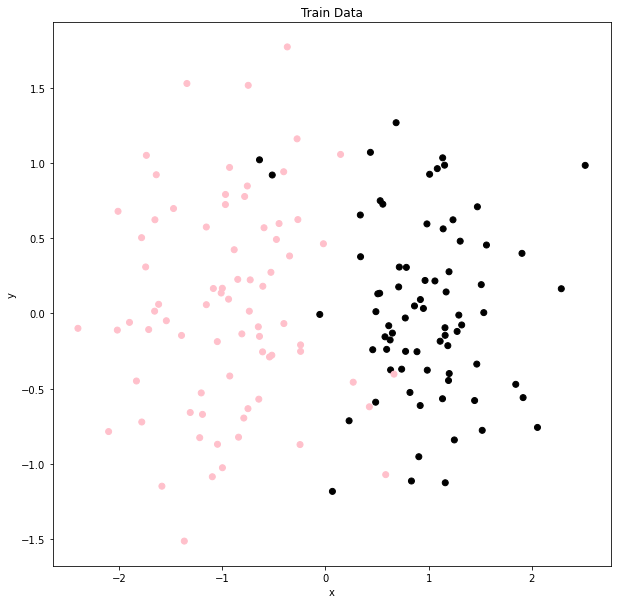

In [6]:
fig = plt.figure(figsize=(10,10))
plt.xlabel("x")
plt.ylabel("y")
plt.title('Train Data')
plt.scatter(train_set[ : , :2][ : , 0], train_set[ : , :2][ : , 1], c=train_set[ : , 2], cmap=matplotlib.colors.ListedColormap(["pink","black"]))

Yes. according to the diagram above, if we ignore the noise data The algorithm converges on the training data because it is possible to seperate it with an line.
but the answer is no If we consider the meaning of convergence to separate all the training data

In [7]:
#initialize x,y for train and test data and set learning rate
Y_train = train_set[ : , 2]
X_train = train_set[ : , :2]
Y_test = test_set[ : , 2]
X_test = test_set[ : , :2]

learning_rate = 0.15

In [8]:
#at first we add x(0)=1 to x of train set and print it shape and set minimum error for missClassification
X_train1 = X_train
Vec_1 = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((Vec_1, X_train), axis=1)
print(X_train.shape)
#minimum of misclassifications
min = X_train.shape[0]+1 

(150, 3)


In [9]:
#then we assign 3 random number to W-vector(an vector of weights) and print out them
weights = np.random.rand(3, 1)
print(weights.shape)
print(weights)
min_weights = weights

(3, 1)
[[0.18885378]
 [0.99535657]
 [0.79354417]]


In [10]:
# create this function for get Number Of Miss Classification Datas
# give X_train, Y_train, new Weights and return number of miss classifications
def numberOfMisslassificationData(X_train, Y_train, weights):
    missedData = 0
    for i in range(len(X_train)) :
        x = X_train[i].reshape(-1, X_train.shape[1])
        y = Y_train[i]
        w = np.dot(x, weights)[0][0]

        #this if return true if data missclassified 
        if (y == 0 and w > 0) or (y == 1 and w < 0) :
            missedData += 1
    return missedData

In [11]:
# this code is the pocket algorithm that iterate 1000 times
# and print missclassification if it fewer than min misscalssification and Previous missClassification
for i in range(10000) :
    p = len(X_train)
    x = X_train[i%p].reshape(-1, X_train.shape[1])
    # actual class
    y = Y_train[i%p]
    # predicated class
    w = np.dot(x, weights)[0][0]
    # for update weights y and w must be in bottom condition:
    # either (y zero and w is positive) or (either y one and w is negative)
    if (y == 0 and w > 0) or (y == 1 and w < 0) :
        if y == 0 :
            # ww in actual is variable that contain new weight for possible update
            ww = weights-(np.transpose(x)*learning_rate)
        else :
            ww = weights+(np.transpose(x)*learning_rate)
        currentMisclassification = numberOfMisslassificationData(X_train, Y_train, ww)
        #update weights
        if currentMisclassification < min :
            weights = ww
            min = currentMisclassification
            print("step: ", i, "   mis classifications", currentMisclassification)

step:  5    mis classifications 16
step:  8    mis classifications 12
step:  49    mis classifications 11
step:  142    mis classifications 9
step:  179    mis classifications 8


In [12]:

print('Updated weight is: ',weights.transpose(),"   minimum missclassification: ",min)
print ("precent Accuracy for Pocket on Train: ",(((X_train.shape[0]- min)/X_train.shape[0])*100))
# it is close to 96% so precision is nice

Updated weight is:  [[-0.26114622  1.05101383  0.31955731]]    minimum missclassification:  8
precent Accuracy for Pocket on Train:  94.66666666666667


In [13]:
X_test1 = X_test
Vec_1 = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((Vec_1, X_test), axis=1)
# Misclassifications and accuracy on test set
print ("misclassifications : ", numberOfMisslassificationData(X_test, Y_test, weights))
print ("precent Accuracy: ",(((X_test.shape[0]- numberOfMisslassificationData(X_test, Y_test, weights))/X_test.shape[0])*100))

misclassifications :  4
precent Accuracy:  92.0


In [14]:
# Plots the dataset and the estimated decision hyperplane
# Dataset and fitted decision hyperplane
def plotting(X, Y, weights, bias):
    q = - weights[1]/weights[2]
    p = - bias/weights[1]
    # show plot and divider line
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Spectral)
    plt.plot(np.linspace(-1,1,2) , q * np.linspace(-1,1,2) + p , '-')
    plt.title("Dataset")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

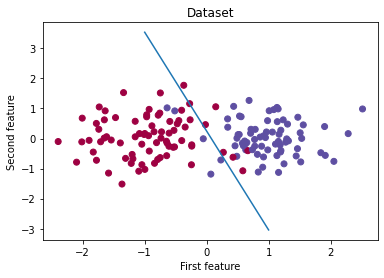

In [15]:
# plot train data with divider line
plotting(X_train1, Y_train, weights, weights[0])

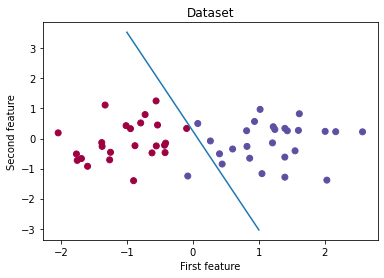

In [16]:
# plot test data with divider line
plotting(X_test1, Y_test, weights, weights[0])